In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from keras.models import Model
from keras.layers import Input,AveragePooling2D,Conv2D, MaxPooling2D, concatenate, Flatten, Dense, BatchNormalization, Dropout

In [ ]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.fit_transform(Y_test)

In [ ]:
X_train = X_train/255.
X_test = X_test/255.

In [ ]:
print("Shape of train: ",X_train.shape,Y_train.shape)
print("Shape of test: ",X_test.shape,Y_test.shape)

Shape of train:  (50000, 32, 32, 3) (50000, 10)
Shape of test:  (10000, 32, 32, 3) (10000, 10)


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


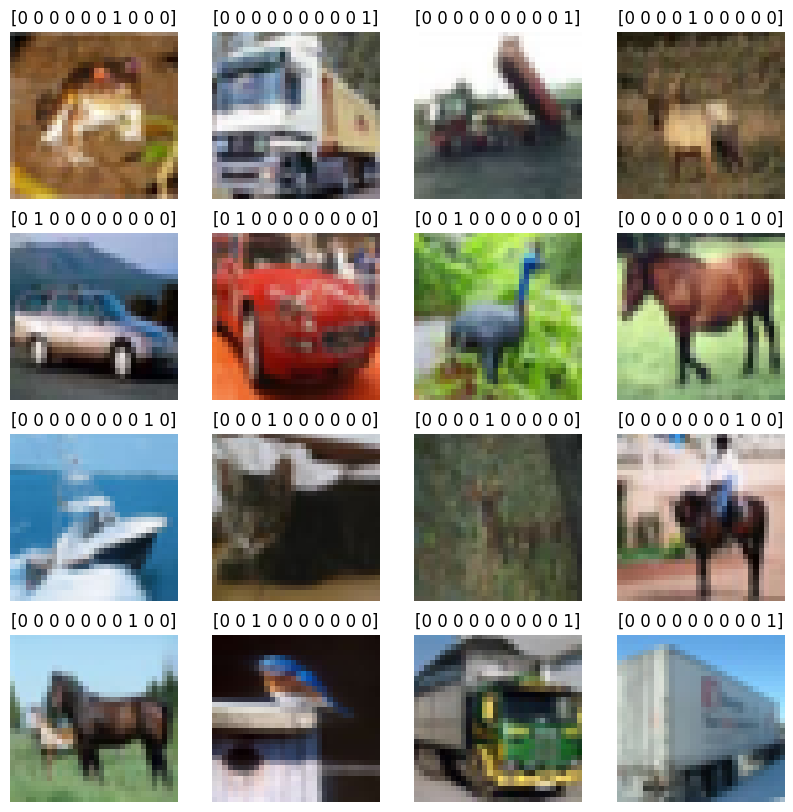

In [ ]:
plt.figure(figsize = (10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(X_train[i])
  plt.title(Y_train[i])
  plt.axis(False)

MODEL

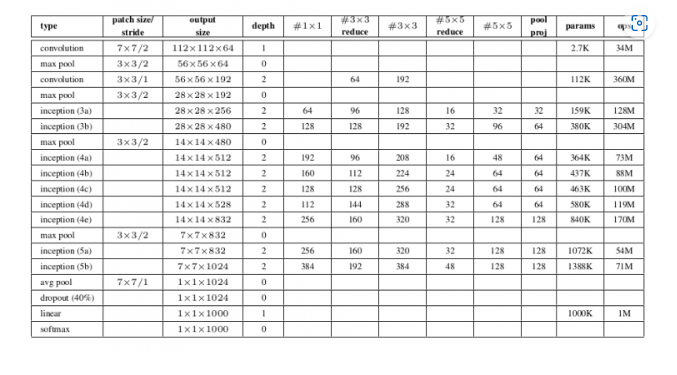

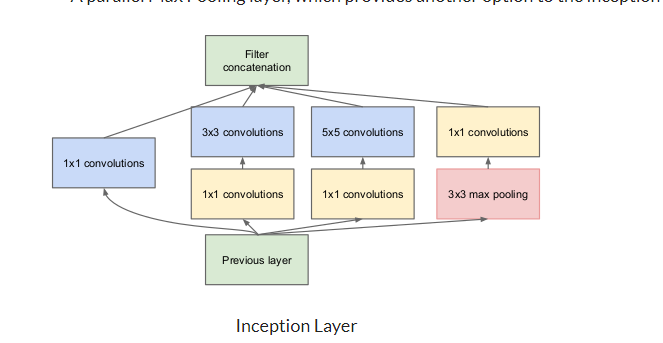

In [ ]:
def inception_block(x,filter_1x1,filter_3x3_reduce,filter_3x3,filter_5x5_reduce,filter_5x5,filter_pool):
    conv_1x1 = Conv2D(filter_1x1,(1,1),padding='same',activation='relu')(x)
    
    conv_3x3 = Conv2D(filter_3x3_reduce,(1,1),padding='same',activation='relu')(x)

    conv_3x3 = Conv2D(filter_3x3,(3,3),padding ='same',activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filter_5x5_reduce,(1,1),padding = 'same',activation='relu')(x)
    conv_5x5 = Conv2D(filter_5x5,(3,3),padding ='same',activation ='relu')(conv_5x5)

    pool = MaxPooling2D((3,3),strides = (1,1),padding = 'same')(x)
    pool = Conv2D(filter_pool,(1,1),padding='same',activation='relu')(pool)

    output = concatenate([conv_1x1,conv_3x3,conv_5x5,pool],axis = 3)
    return output



In [ ]:
input = Input(shape = (32,32,3))

conv1 = Conv2D(filters = 64,kernel_size= (7,7),strides = 2,padding='same',activation ='relu')(input)
batch1 = BatchNormalization()(conv1)
max_pool1 = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(batch1)
conv2 = Conv2D(filters = 192,kernel_size=(3,3),strides=1,padding='same',activation='relu')(max_pool1)
batch2 = BatchNormalization()(conv2)
max_pool2 = MaxPooling2D(pool_size=(3,3),strides = 2,padding='same')(batch2)

inception1 = inception_block(max_pool2,64,96,128,16,32,32)
batch3 = BatchNormalization()(inception1)

inception2 = inception_block(batch3,128,128,192,32,96,64)
batch4 = BatchNormalization()(inception2)
max_pool3 = MaxPooling2D(pool_size=(3,3),strides = 2,padding='same')(batch4)
inception3 = inception_block(max_pool3,192,96,208,16,48,64)
batch5 = BatchNormalization()(inception3)

inception4 = inception_block(batch5,60,112,224,24,64,64)
batch6 = BatchNormalization()(inception4)

inception5 = inception_block(batch6,128,128,256,24,64,64)
batch7 = BatchNormalization()(inception5)

inception6 = inception_block(batch7,112,144,288,32,64,64)
batch8 = BatchNormalization()(inception6)

inception7 = inception_block(batch8,256,160,320,32,128,128)
batch9 = BatchNormalization()(inception7)

max_pool4 = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(batch9)
inception8 = inception_block(max_pool4,256,160,320,32,128,128)
batch10 = BatchNormalization()(inception8)

inception9 = inception_block(batch10,384,192,384,48,128,128)
batch11 = BatchNormalization()(inception9)

avg_pool = AveragePooling2D(pool_size=(7,7),strides = 1,padding='same')(batch11)

drop_out = Dropout(0.5)(avg_pool)
flatten = Flatten()(drop_out)
output = Dense(10,activation='softmax')(flatten) 
model = tf.keras.models.Model(inputs=[input],outputs =[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 8, 8, 64)     0           ['batch_normalization[0][0]']

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['acc'])

In [ ]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=64,epochs = 10)

Epoch 1/10
782/782 [==============================] - 782s 959ms/step - loss: 0.8109 - acc: 0.7204 - val_loss: 3015993856.0000 - val_acc: 0.7074
Epoch 2/10
782/782 [==============================] - 746s 954ms/step - loss: 0.7210 - acc: 0.7497 - val_loss: 2080750592.0000 - val_acc: 0.6971
Epoch 3/10
782/782 [==============================] - 745s 953ms/step - loss: 0.6499 - acc: 0.7737 - val_loss: 2803.7830 - val_acc: 0.6976
Epoch 4/10
782/782 [==============================] - 741s 947ms/step - loss: 0.5792 - acc: 0.7974 - val_loss: 853591936.0000 - val_acc: 0.6939
Epoch 5/10
782/782 [==============================] - 743s 950ms/step - loss: 0.5166 - acc: 0.8215 - val_loss: 0.8697 - val_acc: 0.7189
Epoch 6/10
782/782 [==============================] - 741s 947ms/step - loss: 0.4506 - acc: 0.8432 - val_loss: 2188724224.0000 - val_acc: 0.7057
Epoch 7/10
782/782 [==============================] - 735s 940ms/step - loss: 0.3996 - acc: 0.8616 - val_loss: 139.3393 - val_acc: 0.7015
Epoch 8/